<a href="https://colab.research.google.com/github/FernandoTech31416/CarpetaCursoSQLPY/blob/main/CodigoEficiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Código eficiente en Python

## Zen de Python:

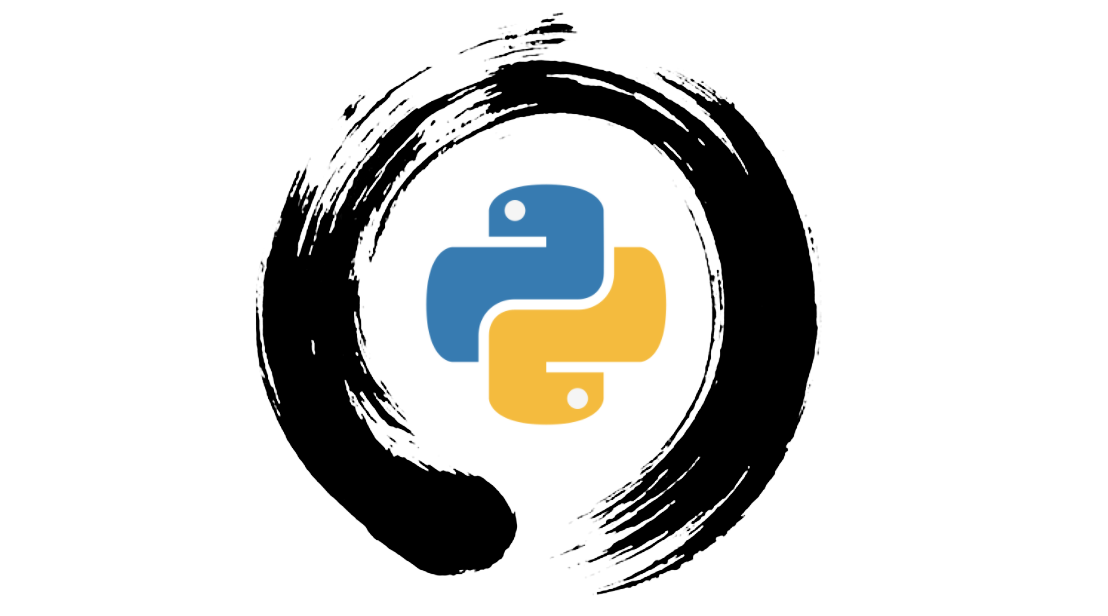

Zen de Python es un conjunto de principios y filosofías que guían el diseño del lenguaje de programación Python. Estos principios fueron formulados por el desarrollador de Python, Tim Peters, y se presentan en el documento llamado "PEP 20: The Zen of Python" (PEP significa "Python Enhancement Proposal" o Propuesta de Mejora de Python).

El Zen de Python se expresa en forma de un poema corto que encapsula los ideales y las prácticas recomendadas para escribir código en Python. Aquí está el poema:

Hermoso es mejor que feo.
Explícito es mejor que implícito.
Simple es mejor que complejo.
Complejo es mejor que complicado.
Plano es mejor que anidado.
Espaciado es mejor que denso.
La legibilidad cuenta.
Los casos especiales no son lo suficientemente especiales como para romper las reglas.
Aunque la practicidad vence a la pureza.
Los errores nunca deben pasar silenciosamente.
A menos que sean silenciados explícitamente.
Frente a la ambigüedad, evitar la tentación de adivinar.
Debería haber una, y preferiblemente solo una, forma obvia de hacerlo.
A pesar de que esa forma puede no ser obvia al principio a menos que seas holandés.
Ahora es mejor que nunca.
Aunque "nunca" es a menudo mejor que "ahora mismo".
Si la implementación es difícil de explicar, es una mala idea.
Si la implementación es fácil de explicar, puede ser una buena idea.
Los espacios de nombres son una gran idea, ¡tengamos más de esos!

Este poema sirve como una guía para que los programadores de Python sigan los principios de simplicidad, legibilidad y transparencia en su código. Estos principios promueven el desarrollo de software mantenible y fácil de entender.

In [1]:
# No pythonic
lista = []
for i in range(100):
  lista.append(i)

# Pythonic
lista2 = [i for i in range(100)]

Las herramientas que Python trae por defecto están optimizadas para trabajar con Python, de tal manera, si encontramos un solución utilizando esa herramientas, entonces esa sería la mejor solución.

In [3]:
# Better
lista3 = list(range(100))

### Algunas funciones útiles:

* ``enumerate``: Dados los elementos de una colección, toma dichos elementos y los enumerado en tuplas en una lista.
* ``map(1,2)``: Aplica una función (1) a los elementos de una colección (2). También se le puede pasar en (1) funciones lambdas.

Ejemplo: Generar una lista con los primeros 10 números cuadrados

In [5]:
# Pythonic
lista_square = list(map(lambda x: x ** 2, list(range(1,11))))
lista_square

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

Veamos el tiempo de ejecución para las siguientes alternativas

In [8]:
import time
inicio = time.time()

# Código a medir
# ------------------------------------
lista = []

for i in range(10000000):
  lista.append(i ** 2)
# ------------------------------------

fin = time.time()

print(fin-inicio)

3.523437976837158


In [9]:
inicio = time.time()

# Código a medir
# ------------------------------------
lista_square = list(map(lambda x: x ** 2, list(range(10000000))))
# ------------------------------------

fin = time.time()

print(fin-inicio)

3.164776563644409


In [10]:
inicio = time.time()

# Código a medir
# ------------------------------------
lista_square = [i ** 2 for i in range(10000000)]
# ------------------------------------

fin = time.time()

print(fin-inicio)

2.4394357204437256


El poder la la librería NumPy

In [14]:
import numpy as np

inicio = time.time()

# Código a medir
# ------------------------------------
lista = list(np.arange(0,10000000) ** 2)
# ------------------------------------

fin = time.time()

print(fin-inicio)

0.8185029029846191


Ejemplo: Dada la numeración de los primeros 10000000 enteros, quedarse solo con los números pares

In [17]:
inicio = time.time()

# Código a medir
# ------------------------------------
lista = []

for i in range(10000000):
  if i % 2 == 0:
    lista.append(i)
# ------------------------------------

fin = time.time()

print(fin-inicio)

1.2438085079193115


In [15]:
inicio = time.time()

# Código a medir
# ------------------------------------
array = np.arange(0,10000000)
lista = list(array[array % 2 == 0])
# ------------------------------------

fin = time.time()

print(fin-inicio)

0.3593769073486328


---

## Examinar tiempo de ejecución

In [20]:
%timeit array = np.arange(0,100)

540 ns ± 38.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Ejecuta el código provisto varias veces para estimar el tiempo de ejecución: El número de bucles es el número de veces que se ejecuta el código por cada ejecución (run)

In [21]:
# 2 ejecuciones y 10 bucles
%timeit -r2 -n10 array = np.arange(0,100)

The slowest run took 4.98 times longer than the fastest. This could mean that an intermediate result is being cached.
2.57 µs ± 1.71 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


Este comando mágico solo nos sirve para una línea de código. Para más de una línea:

In [23]:
%%timeit -r2 -n10
array = np.arange(0,100)
lista = list(array[array % 2 == 0])

27.6 µs ± 5.41 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


Podemos guardar (-o) tiempos de ejecución en variables

In [27]:
var = %timeit -r2 -n10 -o array = np.arange(0,100)
var

The slowest run took 4.30 times longer than the fastest. This could mean that an intermediate result is being cached.
2.56 µs ± 1.59 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


<TimeitResult : 2.56 µs ± 1.59 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)>

Podemos ver el tiempo para cada ejecución (run)

In [28]:
var.timings

[4.151000030105933e-06, 9.649999810790177e-07]

In [29]:
print("Mejor timpo", var.best)
print("Peor timpo", var.worst)

Mejor timpo 9.649999810790177e-07
Peor timpo 4.151000030105933e-06


Luego, podemos cronometrar más cantidad de código y ver el tiempo de ejecución línea por línea, pues los comando mágicos solo funcionan con pocas líneas de código.

### Creación de perfiles

In [33]:
# !pip install line_profiler

h = ['a', 'b', 'c']
hts = np.array([188, 191, 183])
wts = np.array([95, 101, 74])

def convert(h, heights, weights):
  new_hts = [ht * 3 for ht in heights]
  new_wts = [wt * 2 for wt in weights]
  h_data = {}
  for i, j in enumerate(h):
    h_data[j] = (new_hts[i], new_wts[i])
  return h_data

Para ver el tiempo de ejecución línea por línea, primero cargamos el paquete en la sesión

In [34]:
%load_ext line_profiler

Podremos usar ahora el comando mágico ``lprun``

In [36]:
# perfilar una funcion
%lprun -f convert convert(h, hts, wts)

---

## Examinar memoria

In [37]:
# Listas de comprehension numericas enteras
[*range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [38]:
# Libreria a utilizar
import sys

# tamagnio de un objeto en bytes
lista = [*range(100)]
sys.getsizeof(lista)

856

In [39]:
lista = [*range(10000000)]
sys.getsizeof(lista)

80000056

La función anterior solo nos sirve para inspeccionar la memoria objeto por objeto, pero podemos inspeccionar al memoria línea por línea.

In [44]:
# !pip install memory_profiler
%load_ext memory_profiler

In [47]:
%%mprun -f convert convert(h, hts, wts)

ERROR: Could not find file <ipython-input-41-e6308388f91f>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.



Para utilizar este comando mágico las funciones deben ser importadas

In [50]:
# Nos permite trabajar con modulos distribuibles
# !pip install import_ipynb

Luego, en un archivo .py definimos la misma función:

```python
def convert(h, heights, weights):
  new_hts = [ht * 3 for ht in heights]
  new_wts = [wt * 2 for wt in weights]
  h_data = {}
  for i, j in enumerate(h):
    h_data[j] = (new_hts[i], new_wts[i])
  return h_data
```

In [54]:
# Libreria para realizar las importaciones
import import_ipynb

# Realizamos la importacion
from heroes import convert as cv

# veamos 
cv(h, hts, wts)

{'a': (564, 190), 'b': (573, 202), 'c': (549, 148)}

In [56]:
%mprun -f cv cv(h, hts, wts)